# Apply SVM on IRIS data set from sklearn for classification.

Accuracy: 0.9


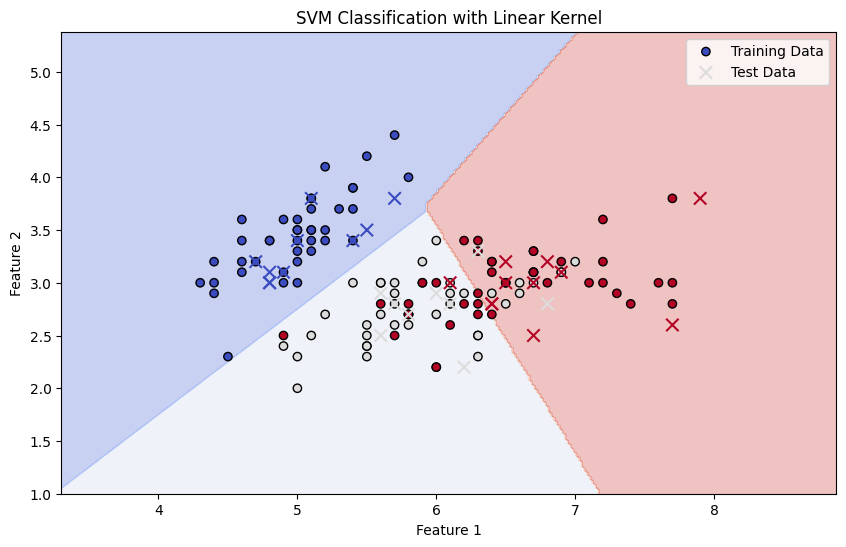

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundaries and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', s=80, label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Linear Kernel')
plt.legend()
plt.show()

# Visualize data classification with different kernels as explained in the Google Colab shared on the theory classroom.

Text(0, 0.5, 'Feature 2')

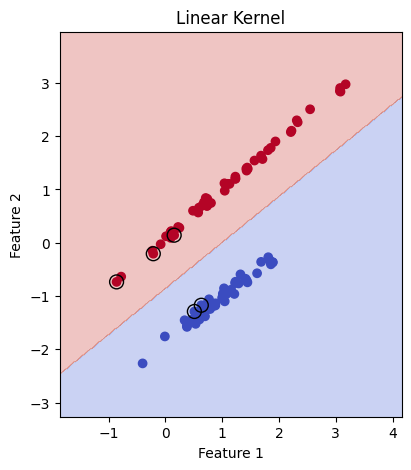

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
n_features = 2
n_informative = 2
n_redundant = 0
n_repeated = 0
X, y = make_classification(n_samples=100, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=n_repeated, n_classes=2, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.figure(figsize=(15, 5))
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z_linear, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')
plt.title('Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

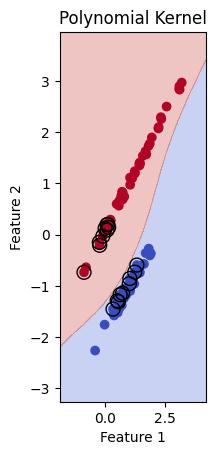

In [3]:
Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z_poly, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')
plt.title('Polynomial Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

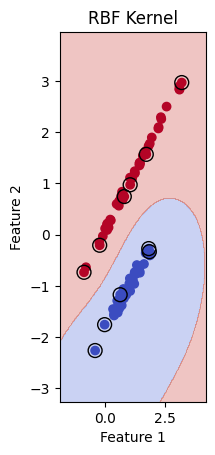

In [4]:
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z_rbf, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')
plt.title('RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Explanation of Different Types of Kernels and Process to Choose the appropriate kernel for a dataset classification
## Types of Kernels in SVM:
*   Linear Kernel: Represents a linear decision boundary by computing the dot product of input vectors. Is suitable for linearly separable data.
*   Polynomial Kernel: Represents a non-linear decision boundary by raising the dot product of vectors to a specified power. Is useful for capturing relationships of higher degrees.
*   RBF (Radial Basis Function) or Gaussian Kernel: Measures the distance between input vectors and scales it by a negative parameter. Is effective in capturing a wide range of decision boundaries.
*   Sigmoid Kernel: Similar to the logistic sigmoid function, computes the dot product of vectors and applies a tanh transformation. Is often used in neural networks.
## Choosing the Right Kernel for Dataset Classification:
*   Understand the Problem: Analyze the data type, features, and complexity of relationships between features.
*   Start Simple: Begin with a linear kernel as a baseline for comparison.
*   Experiment: Test different kernels like polynomial, RBF, etc., and compare their performance.
*   Parameter Tuning: Adjust kernel parameters to optimize performance using techniques like grid search.
*   Domain Knowledge: Utilize domain expertise to select the most suitable kernel for the dataset.
*   Consider Complexity: Evaluate computational requirements for larger datasets.